#**Which pro players can be a good asset to an esports organization?**

Esports Organizations are constantly looking for talented and hard working professional Counter Strike players from all over the world who are a good fit for their organization. The Esports market is very huge, but with my findings, I will be able to make it easier for Esports Organizations to understand, which professional Counter-Strike player would be a good fit for the team. A Counter-Strike team consists of 5 players, which are 5 real people who have lives and spent countless hours playing Counter Strike. These players are paid a monthly salary which are negotiable between the Org(Organization) and the player. That is why it's important to thoroughly look into who the Org is picking up for their Esports team. I will be able to help Organizations make a good business decision using my findings.


#**Research Questions**

Is there a difference in the rating of players with more than 700 maps played and players with less than 700 maps played? This way, Orgs can know if they want to pick up a player who does not have as much experience but is higher rated than a player with more experience but is lower rated. Note that consistency plays a factor as well in these ratings.



Do players who live in the United States have a lower average rating than players who live elsewhere? Many Counter-Strike fans are speculating that North American players are not as good as players from other regions. I want to run a hypothesis on whether that is a true statement or a false statement.



Import Libararies

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from scipy import stats

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


`bold text`#Dataset

https://www.kaggle.com/datasets/sadmadlad/csgo-pro-players-dataset/data

The dataset I am using is from Kaggle. It contains data from 803 different professional Counter-Strike players from 2012-2022.

**Column Description Below**

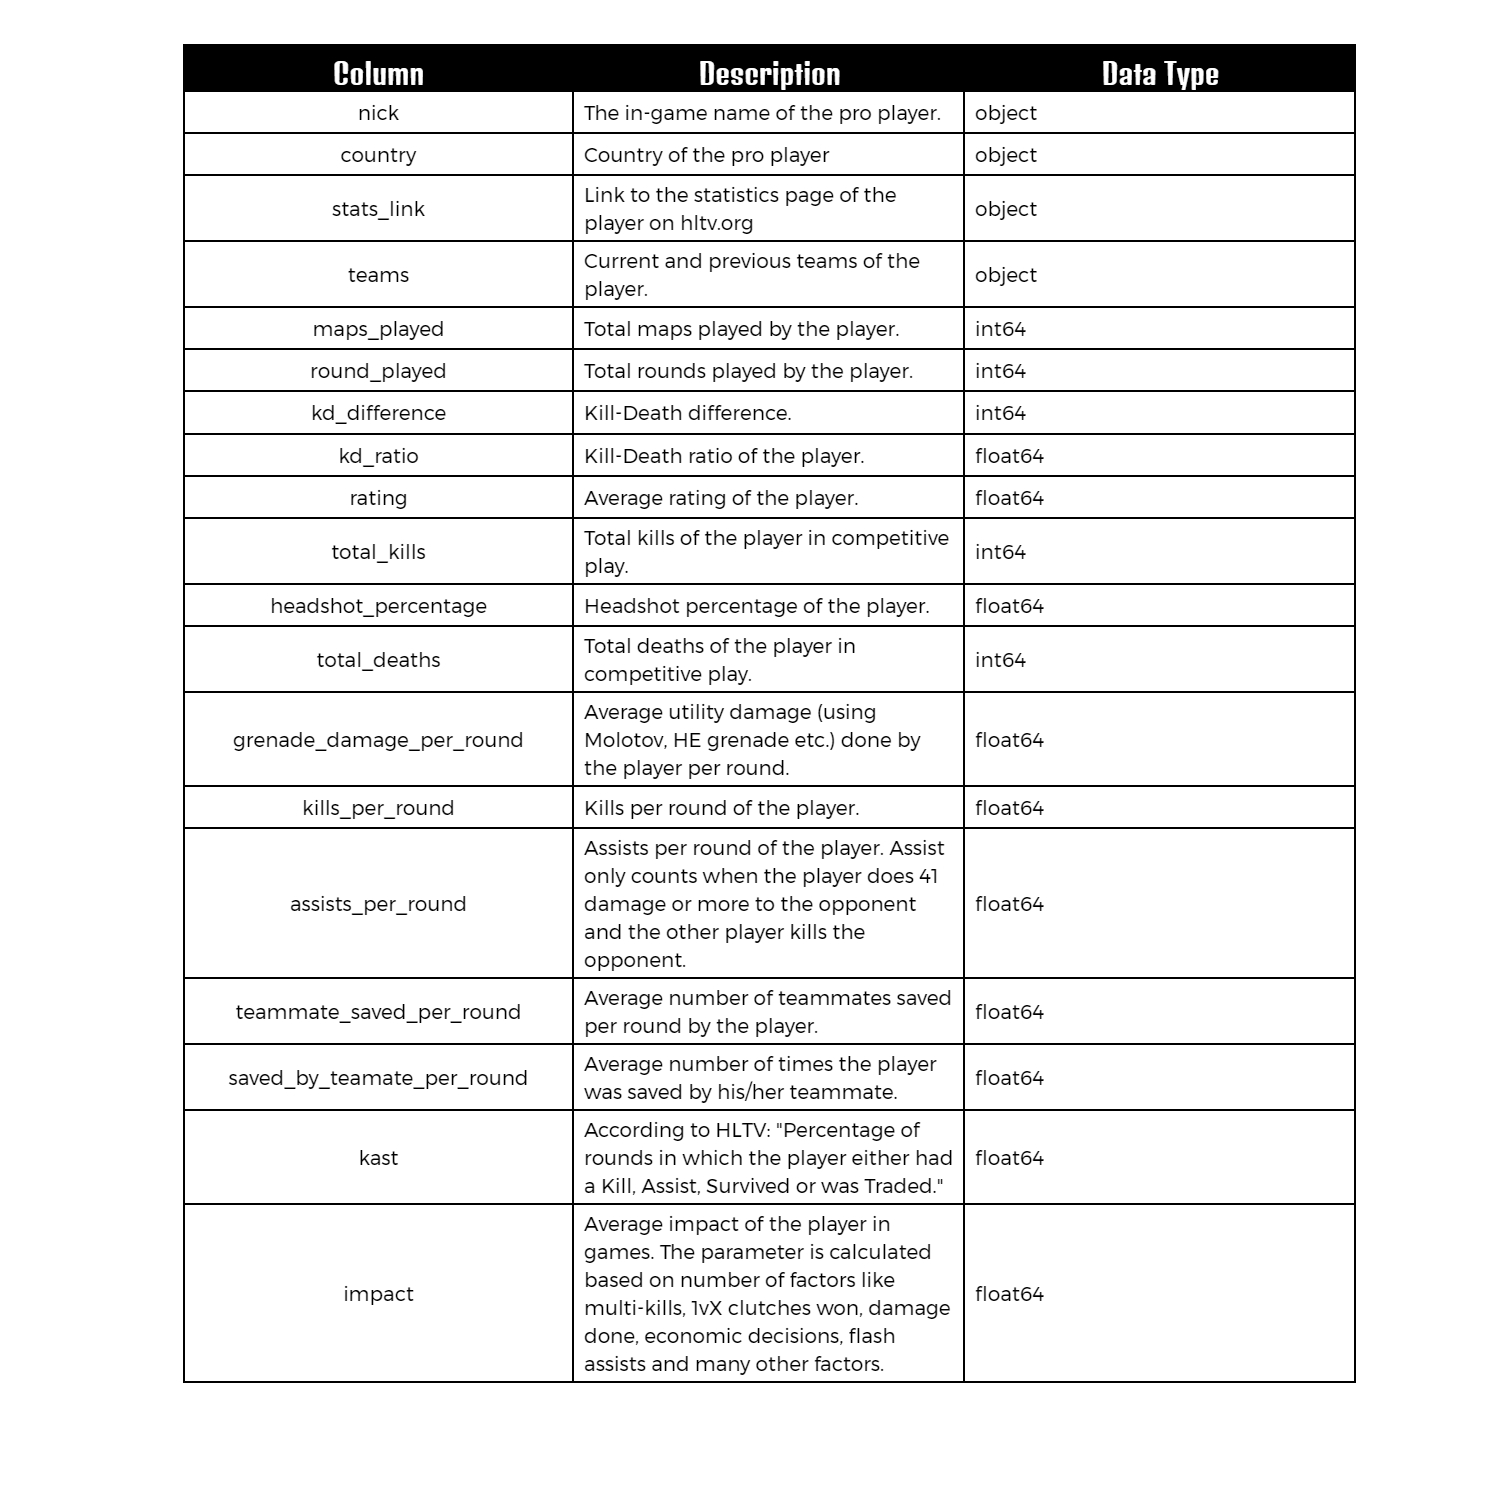

In [19]:
#Import Raw Data
df = pd.read_csv('/hltv_playerStats-complete.csv')
df.head()

,nick,country,stats_link,teams,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
0,ZywOo,France,https://www.hltv.org//stats/players/11893/zywoo,"['Vitality', 'aAa']",970,25491,5917,1.38,1.27,21602,41.3,15685,3.6,0.85,0.13,0.62,0.10,0.12,74.9,1.45
1,s1mple,Ukraine,https://www.hltv.org//stats/players/7998/s1mple,['Natus Vincere'],1532,40464,8864,1.34,1.25,34647,41.3,25783,2.4,0.86,0.10,0.64,0.08,0.11,74.2,1.36
2,sh1ro,Russia,https://www.hltv.org//stats/players/16920/sh1ro,"['Gambit Youngsters', 'Gambit']",847,22465,5361,1.45,1.23,17320,27.9,11959,3.9,0.77,0.11,0.53,0.08,0.11,76.3,1.21
3,deko,Russia,https://www.hltv.org//stats/players/20113/deko,['1WIN'],378,10219,2225,1.37,1.22,8219,36.9,5994,3.3,0.80,0.10,0.59,0.09,0.11,74.5,1.21
4,Kaze,Malaysia,https://www.hltv.org//stats/players/8950/kaze,"['ViCi', 'Flash', 'MVP.karnal']",829,21617,4118,1.32,1.20,16957,30.3,12839,2.9,0.78,0.11,0.59,0.08,0.10,73.7,1.24


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nick                         803 non-null    object 
 1   country                      803 non-null    object 
 2   stats_link                   803 non-null    object 
 3   teams                        803 non-null    object 
 4   maps_played                  803 non-null    int64  
 5   rounds_played                803 non-null    int64  
 6   kd_difference                803 non-null    int64  
 7   kd_ratio                     803 non-null    float64
 8   rating                       803 non-null    float64
 9   total_kills                  803 non-null    int64  
 10  headshot_percentage          803 non-null    float64
 11  total_deaths                 803 non-null    int64  
 12  grenade_damage_per_round     803 non-null    float64
 13  kills_per_round     

In [21]:
#Clean Raw Data
df.isnull().sum()

nick                           0
country                        0
stats_link                     0
teams                          0
maps_played                    0
rounds_played                  0
kd_difference                  0
kd_ratio                       0
rating                         0
total_kills                    0
headshot_percentage            0
total_deaths                   0
grenade_damage_per_round       0
kills_per_round                0
assists_per_round              0
deaths_per_round               0
teammate_saved_per_round       0
saved_by_teammate_per_round    0
kast                           0
impact                         0
dtype: int64

#**Exploratory Data Analysis**


**What is the Average rating of every player in the database?**


In [22]:
df['rating'].mean()

1.0118804483188046

**Who are the top 5 highest rated player in the database?**

<Axes: title={'center': 'Top 5 Rating per Players'}, xlabel='Player Name', ylabel='Rating'>

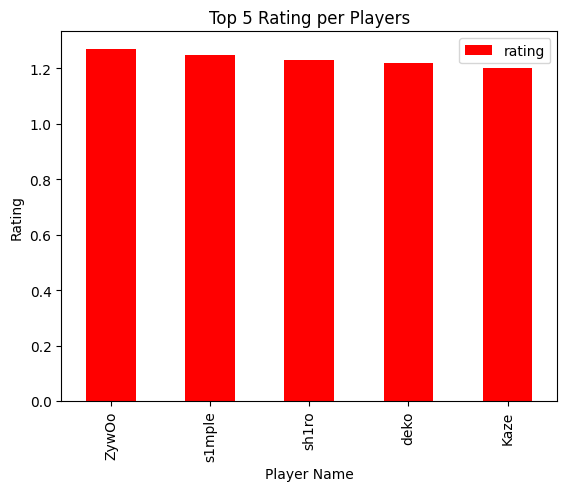

In [23]:
rating_sort=df.sort_values("rating",ascending=False) # sort values by rating
top5_rating=rating_sort[:5]

palette = 'red'
top5_rating=top5_rating[["nick","rating"]]
top5_rating.set_index("nick").plot.bar(color = palette, title = 'Top 5 Rating per Players', xlabel = 'Player Name', ylabel = 'Rating')




**Player Counts Per Country w/ Map**

In [24]:
country_player=df["country"].value_counts()
country_player

United States             83
Denmark                   72
Russia                    64
Brazil                    59
Sweden                    52
Poland                    52
Australia                 46
China                     28
France                    26
Finland                   26
Germany                   25
Canada                    24
Ukraine                   23
Bulgaria                  23
Kazakhstan                16
Norway                    12
Thailand                  11
Serbia                    10
Belarus                    9
United Kingdom             9
Spain                      9
Turkey                     8
Portugal                   8
Argentina                  8
Hungary                    8
Slovakia                   7
New Zealand                7
Romania                    6
Czech Republic             6
Estonia                    6
Mongolia                   6
Lithuania                  5
South Africa               5
Latvia                     5
Belgium       

In [25]:
fig = px.choropleth(country_player, locations=country_player.index, locationmode='country names',
        color=country_player, hover_name='country',
        color_continuous_scale="purples")
fig.update_layout(height=800,
                  width=1400)
fig.update_layout(title_text='Count of Players per Country', title_x=0.5)
fig.show()



**Correlations between Ratings and Maps played**

<Axes: title={'center': 'Ratings to Maps Played for each Player'}, xlabel='maps_played', ylabel='rating'>

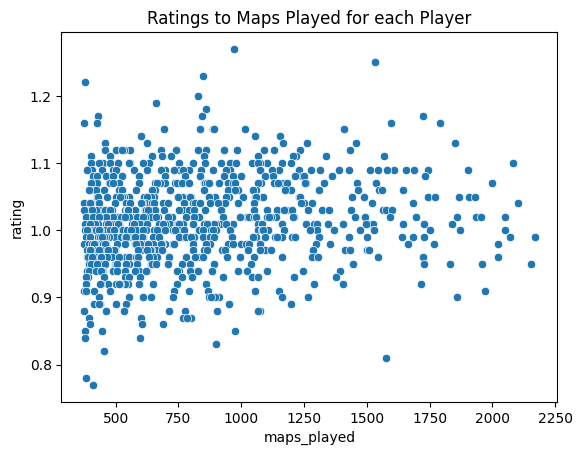

In [26]:
plt = sns.scatterplot(x=df['maps_played'], y=df['rating'])
plt.set_title("Ratings to Maps Played for each Player")
plt

**Distribution of Maps Played**

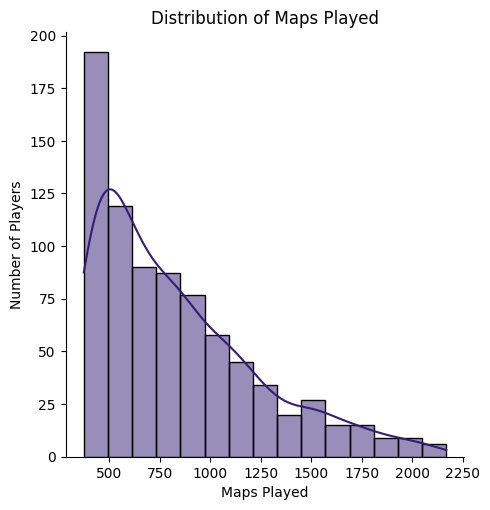

In [68]:
#make this example reproducible
np.random.seed(1)

#create array of 1000 values that follow a normal distribution with mean of 10
data = np.random.normal(size=1000, loc=10)

#create histogram with density curve overlaid to visualize distribution of values
palette = '#351c75'
dist_maps_played = sns.displot(df['maps_played'],color = palette, kde=True)
dist_maps_played
dist_maps_played.set(xlabel='Maps Played',
       ylabel='Number of Players',
       title='Distribution of Maps Played')




#**Hypothesis**


My Hypothesis consist of finding the following questions:

<font color= 'purple'> Is there a difference in the rating of players who have more than 700 maps played and players who have less than 700 maps played?

**Ho: μ1-μ2=0**

There is no difference between the rating of players who have 700 maps played and players who have less than 700 maps played.

**Ha: μ1-μ2≠0**

There is a difference between the rating of players who have 700 maps played and players who have less than 700 maps played.

A t-test will be performed because we are comparing two different groups and one source. This is a two-tailed test.


=================================================================================================================



<font color= 'purple'>Do players who live in the United States have a lower average rating than players who live elsewhere?

**Ho: μ1<=μ2=0**

The average rating of players who live in the United States is less than or equal to the average rating of players who live elsewhere.

**Ha: μ1>μ2≠0**

The average rating of players who live in the United States is greater than the average rating of players who live elsewhere.

A t-test will be performed because we are comparing two different groups and one source. This is a left-tailed test.


**I want to see if there is a difference in the rating of players of have more than 700 maps played and the players who have less than 700 maps played!**

In [208]:
more_than_700 = df.iloc[(df['maps_played'] >= 700).values]
more_than_700.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 800
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nick                         418 non-null    object 
 1   country                      418 non-null    object 
 2   stats_link                   418 non-null    object 
 3   teams                        418 non-null    object 
 4   maps_played                  418 non-null    int64  
 5   rounds_played                418 non-null    int64  
 6   kd_difference                418 non-null    int64  
 7   kd_ratio                     418 non-null    float64
 8   rating                       418 non-null    float64
 9   total_kills                  418 non-null    int64  
 10  headshot_percentage          418 non-null    float64
 11  total_deaths                 418 non-null    int64  
 12  grenade_damage_per_round     418 non-null    float64
 13  kills_per_round     

In [303]:
less_than_700 = df.iloc[(df['maps_played'] <= 700).values]
less_than_700.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 3 to 802
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nick                         385 non-null    object 
 1   country                      385 non-null    object 
 2   stats_link                   385 non-null    object 
 3   teams                        385 non-null    object 
 4   maps_played                  385 non-null    int64  
 5   rounds_played                385 non-null    int64  
 6   kd_difference                385 non-null    int64  
 7   kd_ratio                     385 non-null    float64
 8   rating                       385 non-null    float64
 9   total_kills                  385 non-null    int64  
 10  headshot_percentage          385 non-null    float64
 11  total_deaths                 385 non-null    int64  
 12  grenade_damage_per_round     385 non-null    float64
 13  kills_per_round     

In [307]:
more_than_700[['rating']].describe()

,rating
count,418.000000
mean,1.022536
std,0.067104
min,0.810000
25%,0.980000
50%,1.020000
75%,1.070000
max,1.270000


In [308]:
less_than_700[['rating']].describe()

,rating
count,385.000000
mean,1.000312
std,0.064071
min,0.770000
25%,0.960000
50%,1.000000
75%,1.030000
max,1.220000


<Axes: xlabel='maps_played', ylabel='rating'>

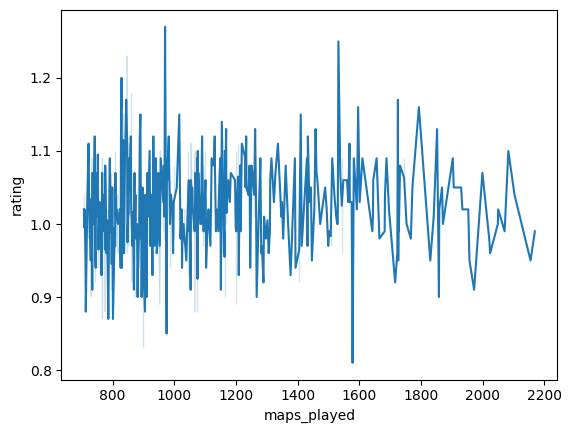

In [312]:
sns.lineplot(data=more_than_700, x="maps_played", y="rating")

<Axes: xlabel='maps_played', ylabel='rating'>

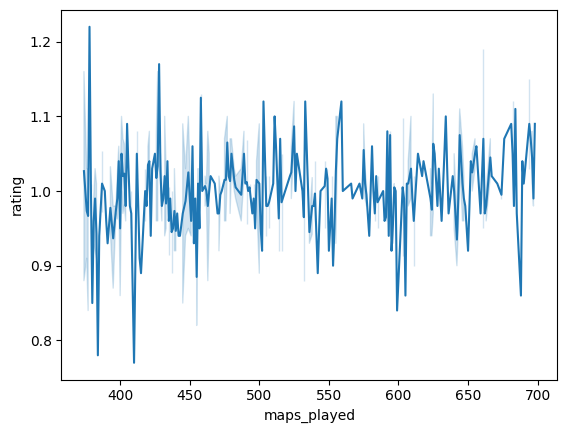

In [297]:
sns.lineplot(data=less_than_700, x="maps_played", y="rating")

##I want to examine if there is a significant difference between the rating of players who have more than 700 maps played and players who have less than 700 maps played. For this, I will perform a t-test.

In [326]:
print(np.var(more_than_700['rating']), np.var(less_than_700['rating']))

0.004492133879718874 0.004094448304941814


The ratio of the larger sample variance to the smaller sample variance is less than 4. This means we can assume that the population variances are equal. Thus, we can proceed to perform the two sample t-test with equal variances.

In [327]:
stats.ttest_ind(a=more_than_700['rating'], b=less_than_700['rating'], equal_var=True)

TtestResult(statistic=4.791121807720344, pvalue=1.976250752185684e-06, df=801.0)

Because the p-value of our test (1.97) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean ratings between the two populations is different.

**Plot of ratings for more than 700 maps played.**

<Axes: ylabel='rating'>

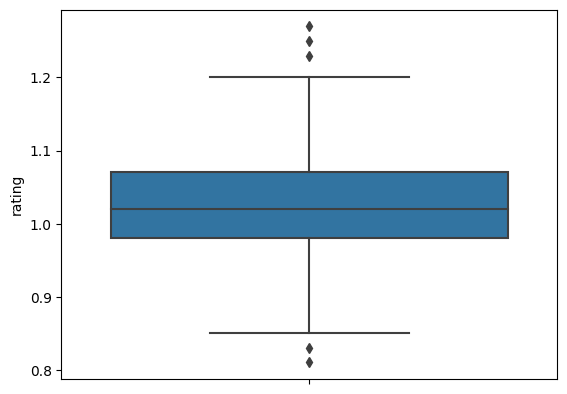

In [336]:
sns.boxplot(y="rating", data=more_than_700)


**Plot of ratings for less than 700 maps played.**

<Axes: ylabel='rating'>

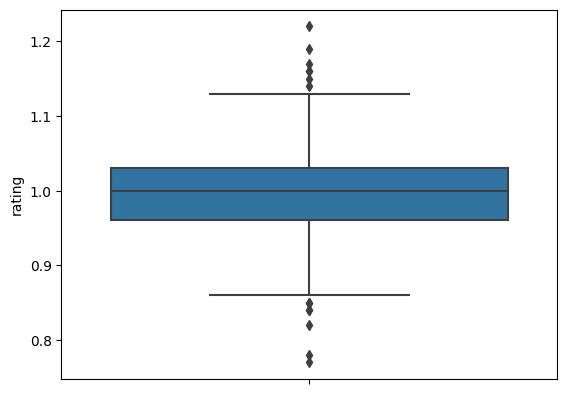

In [337]:
sns.boxplot(y="rating", data=less_than_700)

##Now I want to see if players who live in the United States have a lower average rating than players who live elsewhere? For this I will perform a t-test.

In [340]:
united_states = df.iloc[(df['country'] == 'United States').values]
united_states['rating'].describe()

count    83.00000
mean      1.01241
std       0.05907
min       0.85000
25%       0.98000
50%       1.01000
75%       1.05000
max       1.12000
Name: rating, dtype: float64

In [345]:
other_country = df.iloc[(df['country'] != 'United States').values]
other_country['rating'].describe()

count    720.000000
mean       1.011819
std        0.067407
min        0.770000
25%        0.970000
50%        1.010000
75%        1.060000
max        1.270000
Name: rating, dtype: float64

In [346]:
print(np.var(united_states['rating']), np.var(other_country['rating']))

0.003447205690230806 0.004537384066358028


The ratio of the larger sample variance to the smaller sample variance is less than 4. This means we can assume that the population variances are equal. Thus, we can proceed to perform the two sample t-test with equal variances.

In [347]:
stats.ttest_ind(a=united_states['rating'], b=other_country['rating'], equal_var=True)

TtestResult(statistic=0.07644673335233894, pvalue=0.9390827802569275, df=801.0)

Because the p-value of our test (0.94) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean ratings between the two populations is different.

#**Recomendations & Findings**

We have proven that a player with 700 or more maps played and a player with 700 or fewer maps played, do not make a significant difference in the player's ratings. Therefore, that means that Esports Organizations should most likely not look into the amount of maps played by the player. Of course, this doesn't account for the consistency of that player. The more maps played you have with a higher rating, the more consistent you are as a player, statistically.

We have also proven that a player who lives in the United States and a player who lives in a different country other than the United States, do not make a significant difference in the player's ratings. But, we also figured out that players in the United States are higher rated than player who does not. This means that Esports organizations can take a safe route in choosing players who live in the United States. This doesn't account for how hard the competition is in that region.